In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2> Linear Regression and Multiple Linear Regression </h2>

<h4> Lineear Regression </h4>
<p> Linear Regression is a method whcih helps us understand the relationship between two variables
<ul>
* The predictor / Independet vairable (X)
* The reponse / dependent variable (Y)
</ul>
<br>
The Linear Regression is a linear function the predicts reporse variable as a function of predictor variable.
$$
 Linear Function: Yhat = a + b(X)
$$
   <li> a = intercept of the regression line i.e. The value of Y when X = 0 </li>
    <li>b = the slope of regression line i.e. The value with which Y changes when X increase by 1 Unit</li></p>
   

In [14]:
## Loading Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm

LinearRegression()

<p><h4>How will highway-mpg will help us predict price of the car</h4><p>
    Using Linear Regression we will create a linear function with 'highway-mpg' as the reponse variable and 'price' as the predictor variable


In [16]:
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model using the highway-mpg
lm.fit(X,Y)

LinearRegression()

In [17]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
#Value of intercept a
lm.intercept_

38423.3058581574

In [19]:
# Value of the slope b
lm.coef_

array([-821.73337832])

Final Linear Model
$$
Yhat = a + bX
$$

<b> Price </b> = 38423.3 - 821.73 * <b>highway-mpg</b>

In [20]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [21]:
# Linear function with 'engine-size' and 'price'
X1 = df[['engine-size']]
Y1 = df['price']
lm1.fit(X1,Y1)

LinearRegression()

In [23]:
Y1hat = lm1.predict(X1)
Y1hat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [24]:
lm1.intercept_

-7963.338906281046

In [25]:
lm1.coef_

array([166.86001569])

<p>Fianl Linear model</p>

<b> Price </b> = -7963.33 + 166.86 * <b> engine-size</b>



<h3> Multiple Linear Regression </h3>

We use multiple Linear Regression when we want to use multiple predictor vairable to predict the value of response variable
<p> We will use 'horsepower', 'engine-size', 'curb-weight', highway-mpg'.</p>

In [27]:
Z = df[['horsepower','curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [28]:
lm.intercept_

-15806.624626329194

In [29]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<h3> 3. Model Evaluation using Visualizations </h3>

One of the methods for evaluating Models is by Visualizations

In [31]:
#import viualizations package
import seaborn as sns
%matplotlib inline

<h4> Regression Plots </h4>
Linear Regression models are best decribed in Regression plots

We will use scatter plot for visualizing 'highway-mpg'

(0.0, 48157.45077290253)

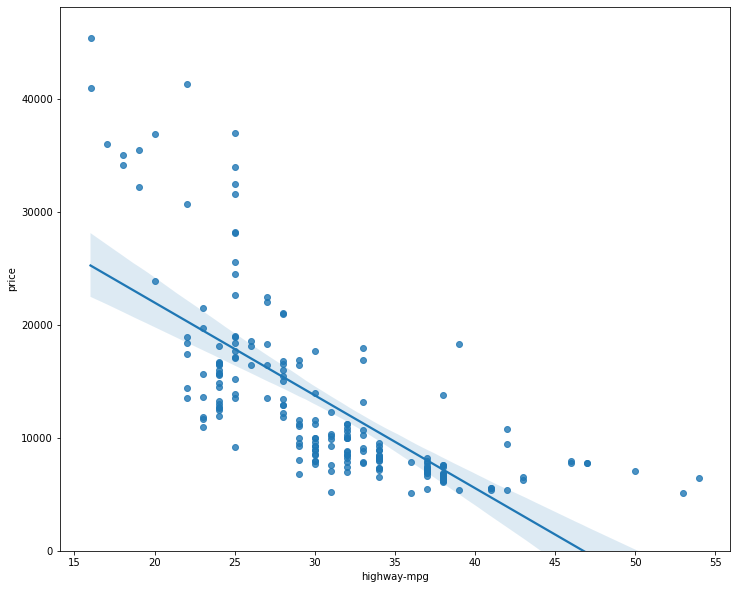

In [35]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

We can see a negative regression plot which means highway-mpg is negatively correlated with price

(0.0, 47414.1)

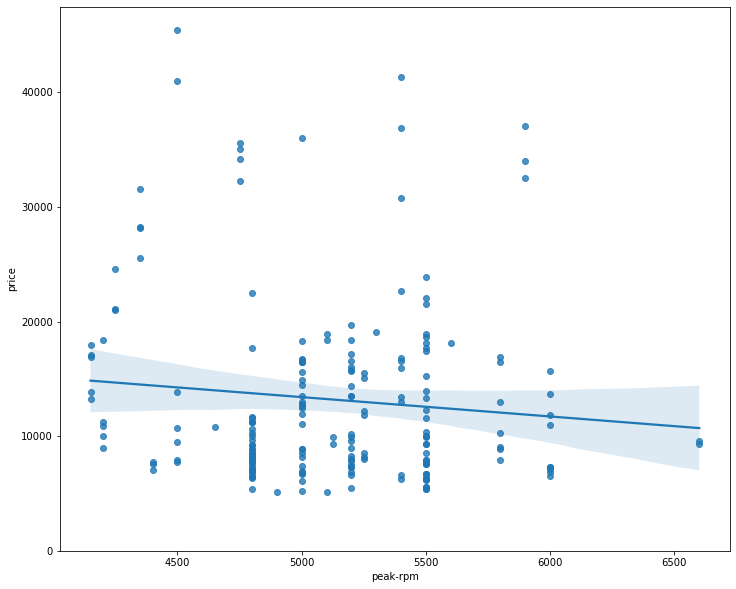

In [38]:
# We will plot for peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)

In [39]:
df[["highway-mpg","peak-rpm","price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


<h4> Residual Plot</h4>

<b>Residual = </b> The differnece between the predicted value(yhat) and the response value(y) is called residual(e). In a regression plot, the distance between the data points to the fitted regression lines is called residual

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

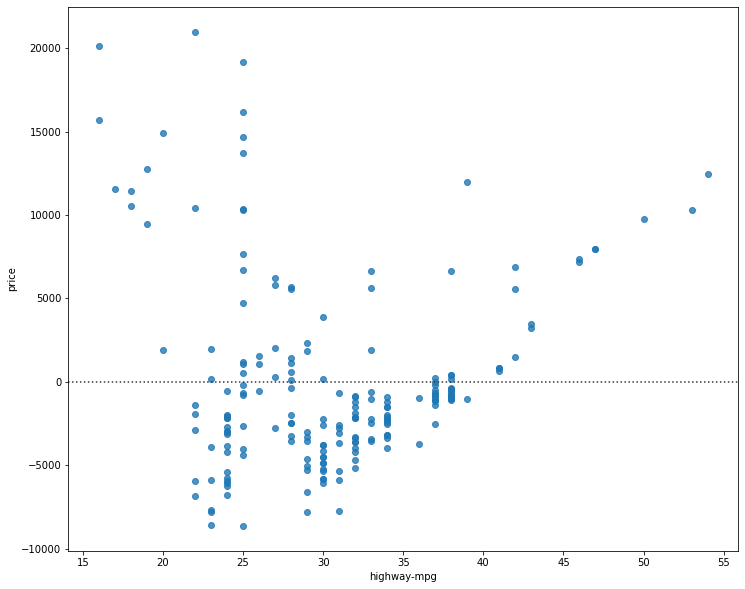

In [42]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x= df['highway-mpg'], y = df['price'])
plt.show()

As we can see the residuals are not randomly spreads along the x axis, we can say that maybe a non-linear plot is more appropriate for the data

<h4> Multiple Linear Regression </h4>

One way to look ay the fit of the moodel is by distributions plots. We can look at the distribution of fitted values from the model and compare it with the values of the distributions of actual model

In [47]:
Yhat = lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

C:\Users\ENVY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ENVY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


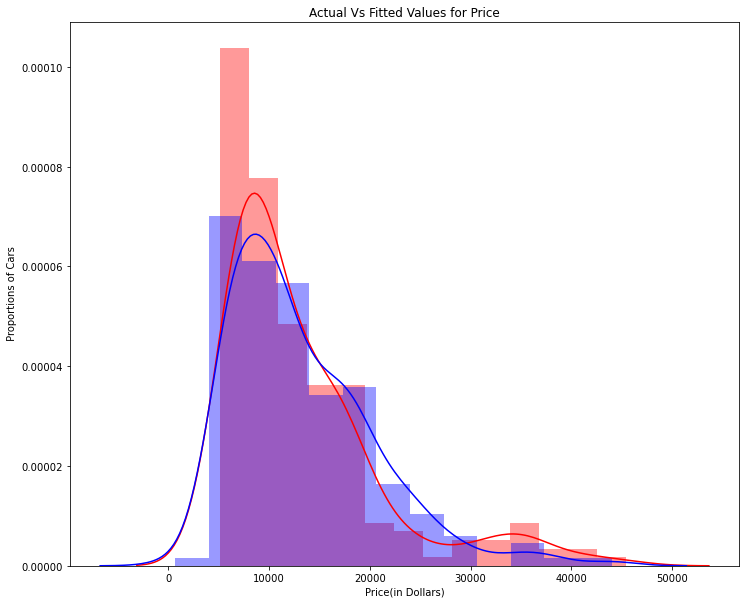

In [51]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot( df['price'] color="r", label=" Actual Value")
sns.distplot(Yhat, color="b", label= " Fitted Values")

plt.title('Actual Vs Fitted Values for Price')
plt.xlabel('Price(in Dollars)')
plt.ylabel(' Proportions of Cars')
plt.show()
plt.close()

<h3> Polynomial Regression </h3>

In [53]:
def Plotpolly(model, i_variabele, d_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(i_variabele, d_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial plot with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [57]:
# let het the variables
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


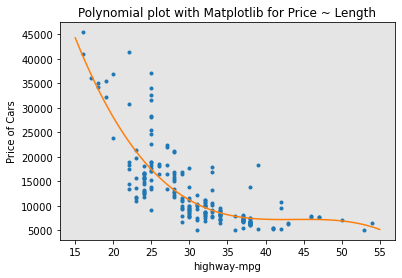

In [58]:
# Lets plot the function
Plotpolly(p, x, y, 'highway-mpg')

In [59]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [60]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


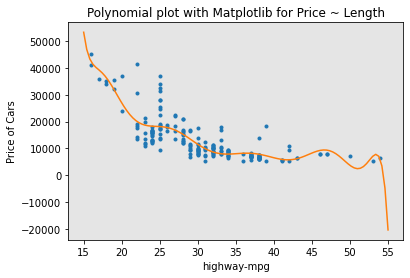

In [61]:
Plotpolly(p1, x, y, 'highway-mpg')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [64]:
Z_pr = pr.fit_transform(Z)

In [65]:
Z.shape

(201, 4)

In [67]:
Z_pr.shape

(201, 15)

Data Pipelines simplifies the steps for processing the data

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [69]:
Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias= False)),('model', LinearRegression())]

In [70]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [71]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [72]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h4> Measure of Simple Linear Regression Model</h4>

Measures to identify the accuracy of the Models
<ul>
    <li><b> Mean Squared Errors</b></li>
    <li><b> R Squared </b></li>
</ul>    

<b>Mean Squared Error</b> - It measures the average of the squared of errors i.e the difference between the actual value and the estimated values

<b>R Squared</b> also known as the coefficient of determinations, Its a measure to indicate how close the data is to the fitted regression Line.

In [73]:
# Simple Regression Line
lm.fit(X,Y)
print("The R Squared value is - ", lm.score(X,Y))

The R Squared value is -  0.4965911884339176


In [74]:
Yhat = lm.predict(X)
print("The Outpput of first 4 predicted values is - ",Yhat[0:4])

The Outpput of first 4 predicted values is -  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(df['price'],Yhat)
print("the mean squared error of the price and the predicted value is ", mse)

the mean squared error of the price and the predicted value is  31635042.944639888


In [78]:
# Multiple Regression Models
lm.fit(Z, df['price'])
print("Rsquared", lm.score(Z,df['price']))

Rsquared 0.8093562806577457


In [79]:
Y_pre_multifit = lm.predict(Z)

In [87]:
print("Mean Squared Error value and Predicted Values",\
      mean_squared_error(df['price'],Y_pre_multifit))

Mean Squared Error value and Predicted Values 11980366.87072649


In [88]:
# Polynomila Regression Model
from sklearn.metrics import r2_score

In [90]:
r_squared = r2_score(y, p(x))
print("RSquared = ",r_squared)

RSquared =  0.674194666390652


In [91]:
mean_squared_error(df['price'],p(x))

20474146.426361207

<h3> Desicion Making - Determining a Good Fit Model</h3>

Good Fit Model >> High RSquared Value & Less Mean Squared Error

<h3> Conslusion </h3>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>